# Entwurf einer Keramiksequenz für das nordwestliche Kongobecken

In [12]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

con = sqlite3.connect("../data/CongoDB.sqlite")

## Liste der keramischen Stilgruppen

In [13]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) Like '%DS%')
           AND ((t_Obj.Typ) != '')
           AND ((t_Obj.Typ) Not Like '%(?)%')
           AND ((t_Obj.Typ) Not Like '%/%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df_pivot = df.pivot_table(values = 'objID', index = 'Typ', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_values(by = 'objID', ascending=False)
df_pivot['pct'] = df_pivot['objID'] / df_pivot['objID'].sum() * 100
df_pivot.head()

,objID,pct
Typ,,
PKM,401,18.153010
EPE,278,12.584880
EBA,225,10.185604
MDB,202,9.144409
BTM,173,7.831598


(0, 421.05000000000001)

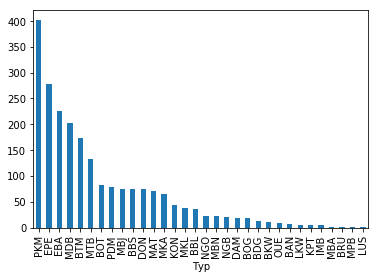

In [14]:
df_pivot['objID'].plot(kind = 'bar')
plt.ylim(0,df_pivot['objID'].max()*1.05)

## Stilgruppen-Kürzel in Wotzka 1995

In [15]:
df = pd.read_csv("../lit/Wotzka1995_StilGrKuerzel.csv", encoding = 'Latin1')
df = df.replace(np.nan,' ', regex=True)
df = df.sort_values(by = 'Typ')
df

,Farbe,Typ,Stilgruppe,Wotzka1995,Seidensticker,Lit,EIA_I,EIA_II,EIA_III,MIA,LIA_I,LIA_II,LIA_III
0,#505b8f,BAN,Bangui,,4.2.1.11,,,,,,,,x
1,#34c7dd,BBL,Bobulu,,4.2.1.4,,,,,,x,,
2,#d6c855,BBS,Bobusa,,4.2.2.5,,,,x,,,,
3,#b4303a,BDG,Bondongo,7.13,4.3.1.3,,,,,,x,,
4,#d642bc,BEK,Bekongo,7.17,,,,,,,x,,
5,#f16944,BKE,Bokele,7.8,,,,x,x,,,,
6,#c988d4,BKN,Bokone,7.22,,,,,,,,x,
7,#e49190,BKW,Bokwango,,4.2.1.6,,,,,,x,x,
8,#c649b7,BLD,Bolondo,7.21,,,,,,,,x,
9,#7381d2,BLM,Bolombi,7.23,,,,,,,,x,x


Anzahl der definierten Stilgruppen:

In [16]:
len(df)

61

In [22]:
df_pivot = df_pivot.reset_index()
pd.merge(left = df_pivot, right = df, on = 'Typ', how='left')

,level_0,index,Typ,objID,pct,Farbe,Stilgruppe,Wotzka1995,Seidensticker,Lit,EIA_I,EIA_II,EIA_III,MIA,LIA_I,LIA_II,LIA_III
0,0,0,PKM,401,18.153010,#56c13f,Pikunda-Munda,7.35,4.2.2.1,,,x,x,,,,
1,1,1,EPE,278,12.584880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,EBA,225,10.185604,#44833a,Ebambe,,4.2.2.12,,,,,,,x,x
3,3,3,MDB,202,9.144409,#c7ab2d,Mandombe,,4.2.2.7,,,,,,x,,
4,4,4,BTM,173,7.831598,#4074e3,Batalimo-Maluba,,4.2.1.1,,,x,x,,,,
5,5,5,MTB,133,6.020824,#3ca4d4,Motengo-Boma,,4.2.1.7,,,,,,,x,
6,6,6,BOT,82,3.712087,#a5482e,Botendo,7.16,4.3.1.4,,,,,,,x,
7,7,7,PDM,78,3.531010,#8f692a,Pandama,,4.2.2.9,,,,,,,x,
8,8,8,MBJ,75,3.395201,#cda166,Mbenja,,4.2.2.10,,,,,,,,x
9,9,9,BBS,74,3.349932,#d6c855,Bobusa,,4.2.2.5,,,,x,,,,
